# Question - 3 (Continue)

In [1]:
import os
import pandas as pd
import numpy as np
from __future__ import division
import operator
from sklearn.model_selection import train_test_split
from sklearn import decomposition
pd.set_option('display.float_format', lambda x: '%.3f' % x)

merg_set_mod = pd.read_csv('Clover_modelling_set.csv'  ,index_col=[0])

# Creating arrays for input and output variables

X = np.array(merg_set_mod.iloc[:,1:-1])
Y = np.array(merg_set_mod.iloc[:,-1])

# Breaking up into train test  set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=10)

#Reducing no of features using PCA
pca = decomposition.PCA(n_components = 10)
pca.fit(X_train)

var_lst = []
pc_exp = list(((pca.explained_variance_ratio_)*100))
for counter, value in enumerate(pc_exp,1):
    var_lst.append((counter, value))
print pd.DataFrame(var_lst, columns = ['Variable_Num','Prcnt_Variance_explained'])

print ' We can see that over 99% of the variance in X can be explained by just the first principal component. This is not \
surprising as the input feature matrix was very sparse and the IVs individually had very low variance in each'

X_train_2 = pca.transform(X_train)
X_test_2 = pca.transform(X_test)

   Variable_Num  Prcnt_Variance_explained
0             1                    99.108
1             2                     0.036
2             3                     0.023
3             4                     0.021
4             5                     0.020
5             6                     0.014
6             7                     0.013
7             8                     0.012
8             9                     0.011
9            10                     0.010
 We can see that over 99% of the variance in X can be explained by just the first principal component. This is not surprising as the input feature matrix was very sparse and the IVs individually had very low variance in each


As this is a classification problem I will choose a variety of classification models and see which performs best:
The accuracy score of RF is: 0.868149292568
The AUC area of RF is: 0.902396916939
The accuracy score of Lasso LR is: 0.855667588226
The AUC area of Lasso LR is: 0.904306844769
The accuracy score of GBC is: 0.873231419743
The AUC area of GBC is: 0.910932167707


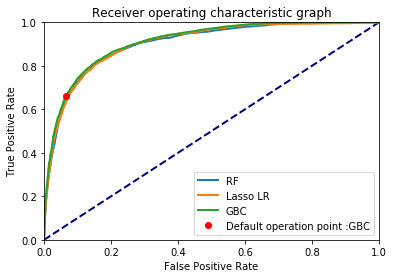

In [2]:
# Building classification Model - 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

print 'As this is a classification problem I will choose a variety of classification models and see which performs best:'

def predict(X_train,y_train,X_test,y_test):
    gbc = GradientBoostingClassifier(random_state=123)
    rf = RandomForestClassifier(n_estimators=30,max_depth=4,random_state=123)
    lr = LogisticRegression(penalty='l2',tol=0.01)
    # plot the ROC curve
    %matplotlib inline
    plt.figure()
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    for model,name in [(rf,'RF'),(lr,'Lasso LR'),(gbc,'GBC')]:
        model.fit(X_train,y_train)
        Y_predict = model.predict(X_test)
        Y_predict_prob = model.predict_proba(X_test)[:,1]
        # print the accuracy of the prediction
        print "The accuracy score of " + name + " is: " + str(model.score(X_test,y_test))
        fpr,tpr,thresholds = metrics.roc_curve(y_test,Y_predict_prob,pos_label=1)
        plt.plot(fpr,tpr,lw=2,label=name)
        # obtain the ROC score
        print "The AUC area of " + name + " is: " + str(metrics.roc_auc_score(y_test,Y_predict_prob))
    # Marking the operation point for the selected model - GBC    
    a = pd.Series(thresholds)
    oper_pnt = a[a.round(3) ==0.5].index[0]
    plt.plot(fpr[oper_pnt],tpr[oper_pnt],'ro',label= 'Default operation point :' + name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic graph')
    plt.legend(loc="lower right")

predict(X_train_2,y_train,X_test_2,y_test)

# QUESTION - 4

In [3]:
print 'All three models are performing equally well which also makes sense as there is not much variability in terms of the \
features that we have used but GBC performs slightly better both in terms of the AUC and the overall accuracy of the predictions\
hence choosing it as the final model'

# Q - 4 Demonstrate confidence in the model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(X_train_2,y_train)
Y_predict = gbc.predict(X_test_2)
Y_predict_prob = gbc.predict_proba(X_test_2)[:,1]

out = precision_recall_fscore_support(y_test, Y_predict,pos_label=1)
conf_mat = confusion_matrix(y_test,Y_predict)
tn, fp, fn, tp = conf_mat.ravel()

print 'Our model has a precision of: {f} and a recall of: {s}'.format(f= round(out[0][1],2),s = round(out[1][1],2))
print ''
print 'High values of precision and recall both at the same time are strong indicators of a good classifier.'
print 'This means that of all the positive cases that exist for the disease we were able to identify 66% of them on the test data\
 and not only that we were able to do this with a good precision of 74% ie of all the cases that we said were positive only 26% were not'
print ''
print 'Again The true positive rate/recall is : {f}'.format(f= round(tp/(tp + fn),2))
print 'The false positive rate/recall is : {f}'.format(f = round(fp/(fp + tn),3))
print 'The true negetive rate/recall is : {f}'.format(f = round(tn/(tn + fp),3)) 
print 'The false negetive rate/recall is : {f}'.format(f = round(fn/(fn + tp),3))
print ''
tn_100, fp_100, fn_100, tp_100 = (conf_mat.ravel()/conf_mat.sum())*100

print 'In summary it means that if our model scores 100 cases out of which 22 have disease and 78 dont our model can identify \
         67% of all the disease cases ie 15 out of 22 and would misclassify 5 cases as positive which are actually negetive.'

print ''
print 'Finally we can also play around with the operation threshold which in this case is set at 0.5 to adjust the FPR and \
            FNR based on the costs associated with the two.'

All three models are performing equally well which also makes sense as there is not much variability in terms of the features that we have used but GBC performs slightly better both in terms of the AUC and the overall accuracy of the predictionshence choosing it as the final model
Our model has a precision of: 0.74 and a recall of: 0.66

High values of precision and recall both at the same time are strong indicators of a good classifier.
This means that of all the positive cases that exist for the disease we were able to identify 93% of them on the test data and not only that we were able to do this with a high precision of 91% ie of all the cases that we said were positive only 9% were not

Again The true positive rate/recall is : 0.66
The false positive rate/recall is : 0.066
The true negetive rate/recall is : 0.934
The false negetive rate/recall is : 0.337

In summary it means that if our model scores 100 cases out of which 22 have disease and 78 dont our model can identify         

# Question 5

In [262]:
print 'As we need to look at relationships between various combinations of demographic variables - sex/married/race and medicine \
 taken I would prefer using association rules to discover structural relationships between possible demographic subgroups which\
 meet a minimum sample size criteria and the medicines taken by them'

As we need to look at relationships between various combinations of demographic variables - sex/married/race and medicine  taken I would prefer using association rules to discover structural relationships between possible demographic subgroups which meet a minimum sample size criteria and the medicines taken by them


In [235]:
# Q- 5 Evidence that a certain drug is prefered by a demographic sub group 

#Subsetting only the set which have 'highBPDiagnosed' and removing unnecessary columns
merg_set_mod_d = merg_set_mod.loc[merg_set_mod['highBPDiagnosed'] == 1]
merg_set_mod_d = merg_set_mod_d.iloc[:,1:-1]
merg_set_mod_d = merg_set_mod_d.iloc[:,~merg_set_mod_d.columns.isin(['pooledWeight','age','panel'])]   

#Dropping columns(medications) which have not been taken by any individual who has the disease
s = merg_set_mod_d.sum()
s1 = s[s==0]
s3 = list(s1.index)
merg_set_mod_d2 = merg_set_mod_d.drop(labels= s3, axis=1)

#Converting race,married,sex to dummies
for i in ['race','married','sex']:
    merg_set_mod_d2 = pd.concat([merg_set_mod_d2,pd.get_dummies(merg_set_mod_d2[i],prefix=i)],axis = 1)
merg_set_mod_d2 = merg_set_mod_d2.iloc[:,~merg_set_mod_d2.columns.isin(['race','married','sex'])]  

#Converting any value/quantity > 0 to 1
merg_set_mod_d2 = merg_set_mod_d2.applymap(lambda x: 1 if x>0 else 0)

In [238]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Running apriori to create possible antecedent combinations keeping a min support of ~ 100 samples
items = apriori(merg_set_mod_d2, min_support=0.007, use_colnames=True)
rules = association_rules(items, metric="lift", min_threshold=1)

In [267]:
# Selecting only rules with bodies which have sex,race or marital status and head as the medicine taken 
def filter_1(itm,ok_set,leng):
    if len(itm) > leng:
        return False
    else:
        for i in itm:
            if i not in ok_set:
                return False
        return True
    
# Filtering all rules based on the function
ok_set_ante = list(merg_set_mod_d2.columns[-17:])
rules_filt_ante = rules.loc[rules['antecedants'].apply(filter_1,args=(ok_set_ante,3,))]

ok_set_cons = list(merg_set_mod_d2.columns[:-17])
rules_filt_cons = rules_filt_ante.loc[rules_filt_ante['consequents'].apply(filter_1,args=(ok_set_cons,1,))]
rules_filt_cons.head(10)

,antecedants,consequents,support,confidence,lift
0,"(married_9, sex_0)",(6742),0.096,0.087,1.748
7,(race_5),(1766),0.666,0.029,1.135
12,(race_5),(2337),0.666,0.011,1.092
32,(married_3),(4961),0.533,0.015,1.043
64,"(race_2, sex_0)",(4082),0.157,0.068,1.062
71,(race_5),(2837),0.666,0.011,1.093
72,"(married_3, race_5)",(7680),0.393,0.021,1.100
88,(race_2),(5198),0.249,0.099,1.020
104,(sex_0),(2512),0.540,0.015,1.449
107,(married_3),(9111),0.533,0.019,1.060


In [264]:
from statsmodels.stats.proportion import proportion_confint

# Sorting and analyzing the rules
sort_rules = rules_filt_cons.sort_values(by='confidence',ascending = False)

# Confidence CI for the top rule 
min_C,max_C = proportion_confint(len(merg_set_mod_d2)*0.028*0.34, len(merg_set_mod_d2)*0.028, alpha=0.05, method='normal')
sort_rules.head(10)

,antecedants,consequents,support,confidence,lift
3235,"(married_0, sex_1, race_5)",(4834),0.028,0.340,1.550
955,"(married_0, sex_1)",(4834),0.040,0.327,1.487
5798,"(married_0, race_5)",(4834),0.066,0.278,1.265
217,"(married_9, race_5)",(4834),0.075,0.268,1.220
5848,(married_0),(4834),0.105,0.265,1.208
3339,"(married_9, sex_0, race_5)",(4834),0.061,0.263,1.196
2623,"(married_3, sex_1, race_5)",(4834),0.219,0.260,1.184
847,"(sex_1, race_5)",(4834),0.326,0.259,1.177
1016,(married_9),(4834),0.116,0.248,1.127
3001,"(married_3, sex_1)",(4834),0.293,0.243,1.105


In [266]:
print 'Q-5 Final Thoughts'
print 'We can observe that there are not many strong rules here ie various subcategories/groupings of sex, married and race are\
not leading to a increase in lift which represents the preference to use a specific drug here. Also the confidence for none of the \
rules is > 0.5 indicating that even if the lift is >1 the rule may not be significant enough to hold any value'
print''
print 'Having said all that the top rule still looks a bit promising and we can say that for Males who are divorced and are\
White and suffer from highBP are 55 percent more likely to take the medicine LISINOPRIL then the general population who suffer from highBP. \
Also the confidence for rule is close to 34% with CIs of (29%,38%) indicating that the rule is observed for a reasonable proportion of the sample.'

Q-5 Final Thoughts
We can observe that there are not many strong rules here ie various subcategories/groupings of sex, married and race arenot leading to a increase in lift which represents the preference to use a specific drug here. Also the confidence for none of the rules is > 0.5 indicating that even if the lift is >1 the rule may not be significant enough to hold any value

Having said all that the top rule still looks a bit promising and we can say that for Males who are -- married and come from arace of -- are 55 percent more likely to take the medicine --. Also the confidence for rule is close to 34% with CIs of (29%,38%)indicating that the rule is observed for a reasonable proportion of the sample.
